# Final Project - Data Science Sprint 11 - M11 T01
   **Women Clothing Ecommerce Sales Data**

Machine Learning model creation

The data contain all sales recorded from June to September 2022. Information such as the customers' personal information wasn't included for privacy and confidentiality. Other irrelevant features were also removed to make the dataset simpler and more user-friendly.

## Exploratory Data Analysis

### File column description

This dataset contains the following columns along with their descriptions:

* order_id: unique identifier for each order placed
* order_date: date and time of order
* sku: a number used by retailer to assign their products
* color: color of the product
* size: size of the product, treat missing values as ( One Size )
* unit_price: unit price of the product
* quantity: quantity ordered for that particular product
* revenue: unit_price * quantity

### Explore dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Read the csv file
sales_df = pd.read_csv("women_clothing_ecommerce_sales.csv")

In [2]:
# Display the first rows
sales_df.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


In [3]:
# Now, let's show the data types and non-null values. As we can see the dataset is already cleaned, 
# there are no missing values
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    int64 
 6   quantity    527 non-null    int64 
 7   revenue     527 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 33.1+ KB


In [4]:
 # Check for zeros in all columns; there are no zero values
sales_df[sales_df == 0].count()    

order_id      0
order_date    0
sku           0
color         0
size          0
unit_price    0
quantity      0
revenue       0
dtype: int64

In [5]:
# Take a picture of the statistical data of dataframe
sales_df.describe()

,order_id,unit_price,quantity,revenue
count,527.000000,527.000000,527.000000,527.000000
mean,115.313093,274.973435,1.011385,278.024668
std,73.106716,34.517412,0.106193,44.741095
min,1.000000,191.000000,1.000000,191.000000
25%,54.000000,266.000000,1.000000,266.000000
50%,110.000000,278.000000,1.000000,278.000000
75%,166.000000,288.000000,1.000000,288.000000
max,273.000000,899.000000,2.000000,899.000000


In [6]:
# Now let's check if there are null values
sales_df.isna().sum()

order_id       0
order_date     0
sku            0
color          0
size          37
unit_price     0
quantity       0
revenue        0
dtype: int64

In [7]:
# Due that we have only 527 rows, let's check these 37 rows in order to find out what value should
# be applied for the missing one instead of removing rows
# Let's list the rows of null values
sales_sku_null = sales_df[sales_df['size'].isnull()].sort_values('sku')
sales_sku_null

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
9,9,2022/6/11 22:53:00,239,Black,NaN,258,1,258
458,121,2022/9/29 21:14:00,239,Gray,NaN,278,1,278
443,106,2022/9/24 15:57:00,239,Gray,NaN,259,1,259
414,81,2022/9/18 8:12:00,239,Yellow,NaN,278,1,278
407,75,2022/9/17 21:03:00,239,Rust,NaN,278,1,278
369,45,2022/9/10 18:43:00,239,Navy Blue,NaN,278,1,278
349,25,2022/8/8 15:11:00,239,Skintone,NaN,278,1,278
348,25,2022/8/8 15:11:00,239,Brown,NaN,239,1,239
347,25,2022/8/8 15:11:00,239,Navy Blue,NaN,239,1,239
282,244,2022/8/25 22:07:00,239,Gray,NaN,278,1,278


In [8]:
# Now lets group all by sku with a null size and count them 
sales_sku_null.groupby('sku')['quantity'].sum().reset_index()

,sku,quantity
0,239,16
1,339,4
2,439,1
3,77,16


In [9]:
# Now, let's filter the original data frame in order to count all rows with the sku found with 
# null values. So we can check that they are the same quantities
list_sku = ['239', '339', '439', '77']
sales_df_filter = sales_df[sales_df['sku'].isin(list_sku)]
sales_df_filter.groupby('sku')['quantity'].sum().reset_index()


,sku,quantity
0,239,16
1,339,4
2,439,1
3,77,16


In [10]:
# So we can deduce that may be these null sizes belong to articles that do not have an specific 
# size, and we can create a new size group. As on the writen on the dataset documentacion, we 
# are going to treat missing values as "ONE SIZE"
sales_df.fillna("One Size", inplace = True)
sales_df.isna().sum()

order_id      0
order_date    0
sku           0
color         0
size          0
unit_price    0
quantity      0
revenue       0
dtype: int64

In [11]:
# Let's check the values on Size. We can find that there are some "One SIze" instead of "One Size"
sales_df['size'].value_counts()

XL          164
M            92
L            91
One Size     82
2XL          43
3XL          40
4XL           9
One SIze      5
S             1
Name: size, dtype: int64

In [12]:
sales_df['size'].replace('One SIze' , 'One Size', inplace = True)

In [13]:
sales_df['size'].value_counts()

XL          164
M            92
L            91
One Size     87
2XL          43
3XL          40
4XL           9
S             1
Name: size, dtype: int64

## Relevant questions about data

### What are the best and worst-selling SKU items?


In [14]:
# This is the list of sku vs quantity sold
sales_sku = sales_df[['sku','quantity']].groupby(['sku']).sum().sort_values(by = 'quantity', ascending = False).reset_index()
sales_sku

,sku,quantity
0,799,287
1,708,99
2,bobo,17
3,9699,17
4,239,16
5,77,16
6,89,13
7,79,9
8,3799,9
9,1719,8


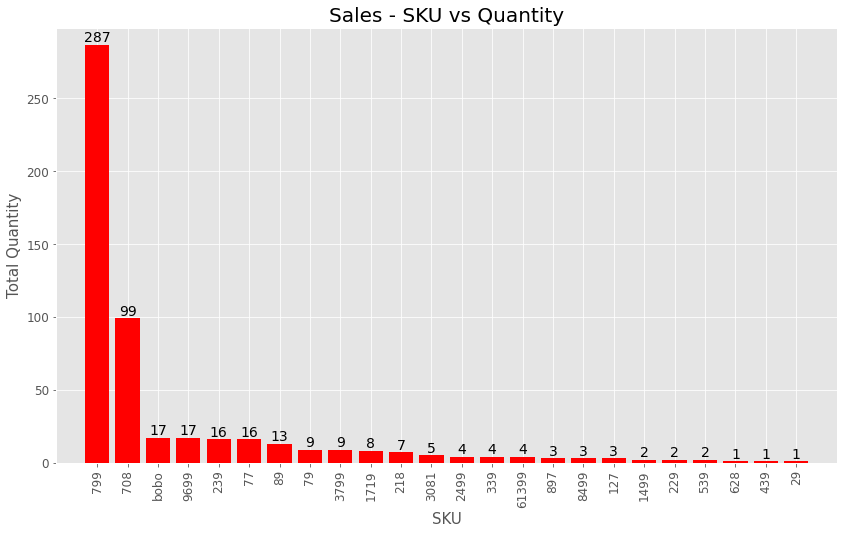

In [15]:
plt.style.use('ggplot')
# Let's configure a sufficiently large plotting space for this graph

fig, ax = plt.subplots(figsize=(14,8))

# Create a barplot
bars = plt.bar(sales_sku['sku'], sales_sku['quantity'], color='red')

# Add quantity values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom', fontsize=14)

ax.set_title('Sales - SKU vs Quantity', size = 20)
ax.set_ylabel('Total Quantity', size=15)
ax.set_xlabel('SKU', size=15)

ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12, rotation=90)

ax.margins(0.04, 0.04)

# Save plot to JPEG file
plt.savefig('01-sales-sku-quantity.jpg', dpi=300, bbox_inches='tight')

plt.grid(True)

plt.show()

As we can see on the graph the best selling sku is '799' with a total of 287 units, and the worst are skus '628', '439, and '29' with only 1 unit

### What are the best and worst-selling items by color?


In [16]:
# This is the list of colors
qty_color = sales_df[['color','quantity']].groupby(['color']).sum().sort_values(by = 'quantity', ascending = False).reset_index()
qty_color

,color,quantity
0,Dark Blue,401
1,Light Blue,26
2,Black,15
3,Grey Wash,9
4,Mid Wash,8
5,Navy Blue,7
6,B,6
7,Dark Wash,5
8,Blue,4
9,C,4


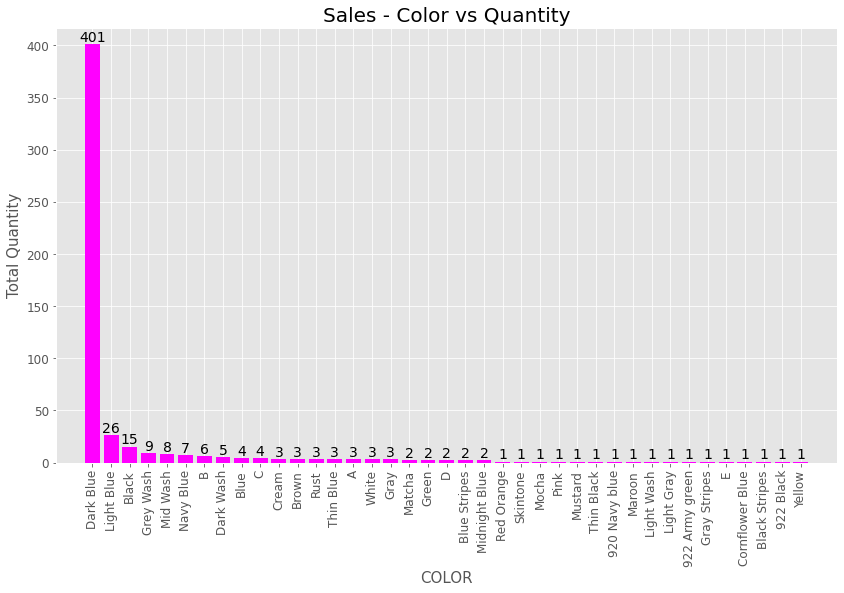

In [17]:
# Let's configure a sufficiently large plotting space for this graph

fig, ax = plt.subplots(figsize=(14,8))

# Create a barplot
bars = plt.bar(qty_color['color'], qty_color['quantity'], color='magenta')

# Add quantity values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom', fontsize=14)

ax.set_title('Sales - Color vs Quantity', size = 20)
ax.set_ylabel('Total Quantity', size=15)
ax.set_xlabel('COLOR', size=15)

ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12, rotation=90)

ax.margins(0.04, 0.04)

# Save plot to JPEG file
plt.savefig('02-sales-color-quantity.jpg', dpi=300, bbox_inches='tight')


plt.show()

### What are the best and worst-selling items by color total revenue?


In [18]:
# This is the list of color 
#sales_color = sales_df[['color','revenue']].groupby(['color']).sum().sort_values(by = 'revenue', ascending = False).reset_index()
sales_color = sales_df[['color','revenue']].groupby(['color']).sum().sort_values(by = 'revenue', ascending = False).reset_index()
#.revenue.sum().sort_values(by = 'revenue', ascending = False).reset_index()
sales_color.head(5)

,color,revenue
0,Dark Blue,112364
1,Light Blue,7337
2,Black,4428
3,Grey Wash,2390
4,Mid Wash,2043


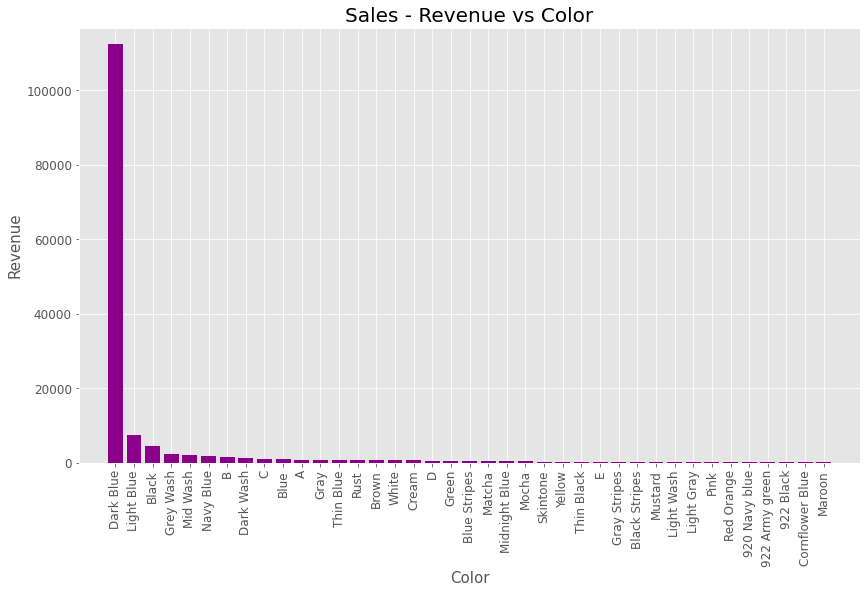

In [19]:
# Let's configure a sufficiently large plotting space for this graph

fig, ax = plt.subplots(figsize=(14,8))

# Create a barplot
bars = plt.bar(sales_color['color'], sales_color['revenue'], color='darkmagenta')

# Add quantity values on top of each bar
#for bar in bars:
#    height = bar.get_height()
#    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
#             ha='center', va='bottom', fontsize=14)

ax.set_title('Sales - Revenue vs Color', size = 20)
ax.set_ylabel('Revenue', size=15)
ax.set_xlabel('Color', size=15)

ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12, rotation=90)

ax.margins(0.04, 0.04)

# Save plot to JPEG file
plt.savefig('03-sales-revenue-color.jpg', dpi=300, bbox_inches='tight')


plt.show()

### What are the best and worst-selling items by size quantity?


In [20]:
# This is the list of color 
qty_size = sales_df[['size','quantity']].groupby(['size']).sum().sort_values(by = 'quantity', ascending = False).reset_index()
qty_size

,size,quantity
0,XL,166
1,M,93
2,L,92
3,One Size,89
4,2XL,43
5,3XL,40
6,4XL,9
7,S,1


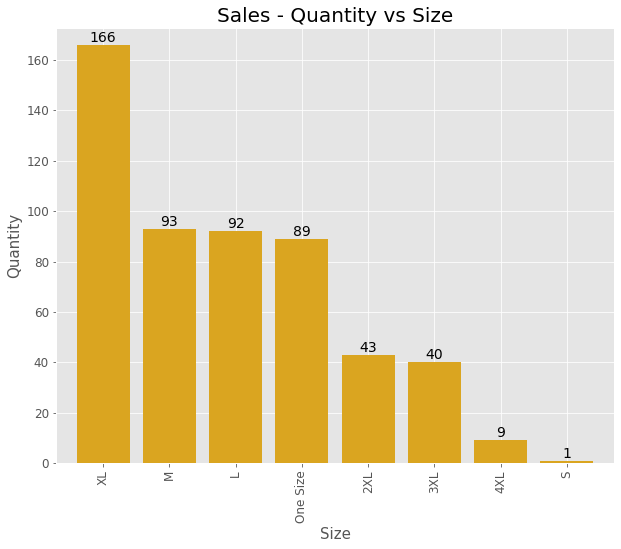

In [21]:
# Let's configure a sufficiently large plotting space for this graph
fig, ax = plt.subplots(figsize=(10,8))

# Create a barplot
bars = plt.bar(qty_size['size'], qty_size['quantity'], color='goldenrod')

# Add quantity values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom', fontsize=14)

ax.set_title('Sales - Quantity vs Size', size = 20)
ax.set_ylabel('Quantity', size=15)
ax.set_xlabel('Size', size=15)

ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12, rotation=90)

ax.margins(0.04, 0.04)

# Save plot to JPEG file
plt.savefig('04-sales-size-quantity.jpg', dpi=300, bbox_inches='tight')


plt.show()

### What are the best and worst-selling items by size revenue?


In [22]:
# This is the list of color 
sales_size = sales_df[['size','revenue']].groupby(['size']).sum().sort_values(by = 'revenue', ascending = False).reset_index()
sales_size

,size,revenue
0,XL,45868
1,M,25755
2,L,25362
3,One Size,22379
4,2XL,12422
5,3XL,11301
6,4XL,3205
7,S,227


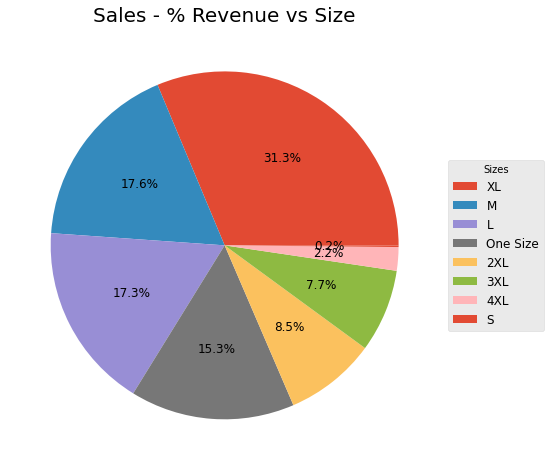

In [23]:
# Let's configure a sufficiently large plotting space for this graph
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%" #"\n({absolute:d} g)"

wedges, texts, autotexts = ax.pie(sales_size['revenue'], autopct=lambda pct: func(pct, sales_size['revenue']),
                                  textprops=dict(color="black"))

ax.legend(wedges, sales_size['size'],
          title="Sizes",
          loc="center left",
          fontsize = 12,
          bbox_to_anchor=(1, 0, 4.0, 1))

plt.rcParams['legend.title_fontsize'] = 'large'


plt.setp(autotexts, size=12, weight="normal")

plt.title("Sales - % Revenue vs Size", size = 20)

# Save plot to JPEG file
plt.savefig('05-sales-revenue-size.jpg', dpi=300, bbox_inches='tight')
plt.show()

### What is the average order value?


In [24]:
# This is the average order of all data
avg = sales_df['revenue'].mean()
print ("The average order value is: ", avg)

The average order value is:  278.0246679316888


### What are the peak days or time periods with the highest sales?


In [25]:
# Let's format the data column
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], format='%Y-%m-%d %H:%M:%S.%f')

In [26]:
# Set the date column as the index of the DataFrame
sales_df.set_index('order_date', inplace=True)

In [27]:
# Create a new column for day/week/month
sales_df['day'] = sales_df.index.day
sales_df['hour'] = sales_df.index.hour
sales_df['weekday'] = sales_df.index.isocalendar().day
sales_df['week'] = sales_df.index.isocalendar().week
sales_df['month'] = sales_df.index.month

In [28]:
# Aggregate the data based on day/week/month
day_sales = sales_df.groupby('day')['revenue'].sum()
hour_sales = sales_df.groupby('hour')['revenue'].sum()
weekday_sales = sales_df.groupby('weekday')['revenue'].sum() #Monday: day 1
week_sales = sales_df.groupby('week')['revenue'].sum()
month_sales = sales_df.groupby('month')['revenue'].sum()

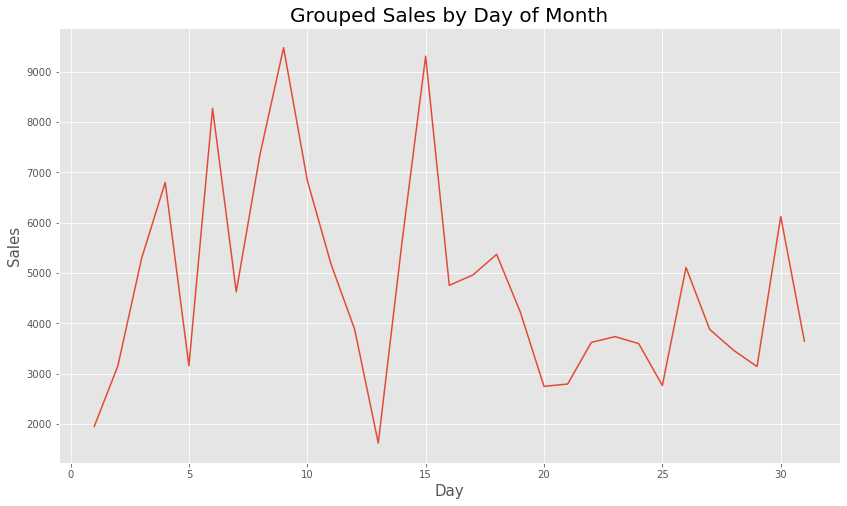

In [29]:
fig, ax = plt.subplots(figsize=(14,8))
# Plot the sales for each day
plt.title("Grouped Sales by Day of Month", size = 20)
plt.plot(day_sales)
plt.xlabel('Day', size =15)
plt.ylabel('Sales', size = 15)

# Save plot to JPEG file
plt.savefig('06-grouped_sales_month_day.jpg', dpi=300, bbox_inches='tight')

plt.show()

In order to know better the user of this ecommerce platform, we can see that we have some days of the month with more sellings. These are 6, 9 and 15.

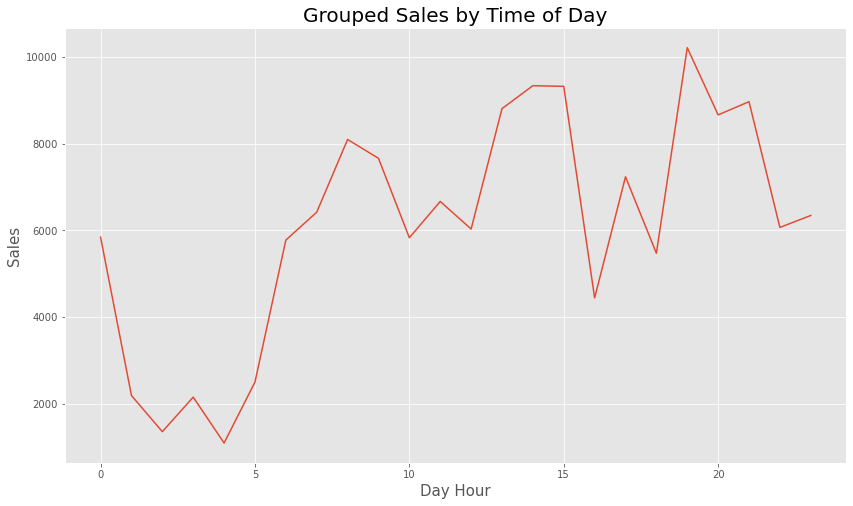

In [30]:
fig, ax = plt.subplots(figsize=(14,8))
# Plot the sales for each day
plt.title("Grouped Sales by Time of Day", size = 20)
plt.plot(hour_sales)
plt.xlabel('Day Hour', size=15)
plt.ylabel('Sales', size = 15)

# Save plot to JPEG file
plt.savefig('07-grouped_sales_hour_day.jpg', dpi=300, bbox_inches='tight')

plt.show()

Hours arround 8, 14 and 19 are mostly used to buy on the platform. 

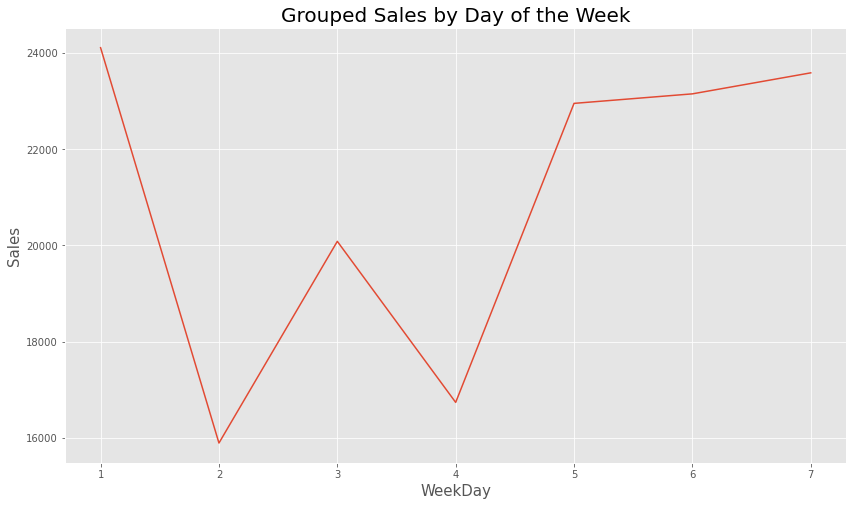

In [31]:
fig, ax = plt.subplots(figsize=(14,8))
# Plot the sales for each day
plt.title("Grouped Sales by Day of the Week", size = 20)
plt.plot(weekday_sales)
plt.xlabel('WeekDay', size = 15)
plt.ylabel('Sales', size = 15)

# Save plot to JPEG file
plt.savefig('08-grouped_sales_weekday.jpg', dpi=300, bbox_inches='tight')  #Monday: day 1

plt.show()

As can be shown on the grpah users perfer to buy from friday to sunday

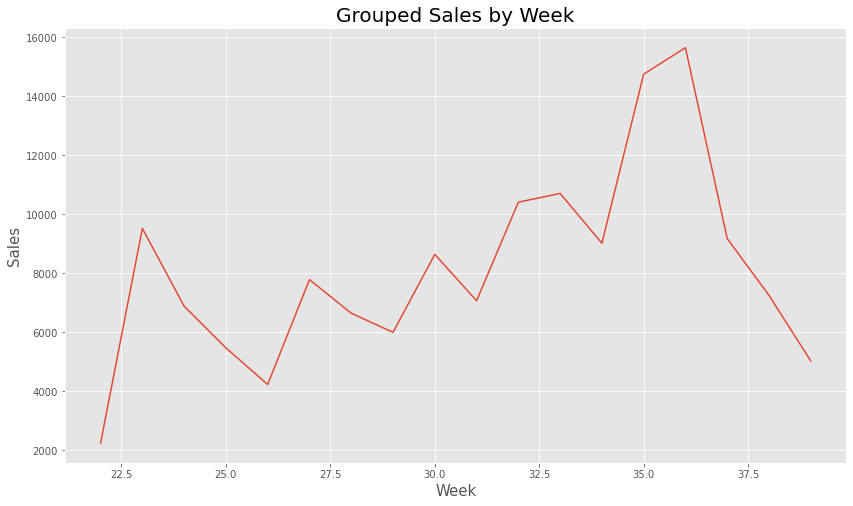

In [32]:
fig, ax = plt.subplots(figsize=(14,8))
# Plot the sales for each week
plt.title("Grouped Sales by Week", size = 20)
plt.plot(week_sales)
plt.xlabel('Week', size = 15)
plt.ylabel('Sales', size = 15)

# Save plot to JPEG file
plt.savefig('09-grouped_sales_weekday.jpg', dpi=300, bbox_inches='tight')

plt.show()

The data we have for this ecommerce corresponds to 4 months from June to September. Although we do not have more information, it can be deduced that sales have been increasing from the beginning. For some reason at the end of the dataset sales go down.

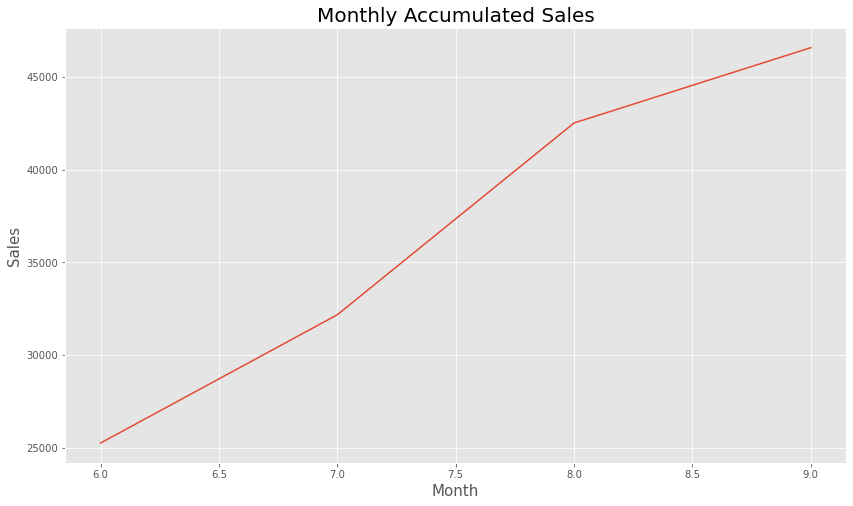

In [33]:
fig, ax = plt.subplots(figsize=(14,8))
# Plot the sales for each month
plt.title("Monthly Accumulated Sales", size = 20)
plt.plot(month_sales)
plt.xlabel('Month', size = 15)
plt.ylabel('Sales', size = 15)

# Save plot to JPEG file
plt.savefig('10-grouped_sales_monthly.jpg', dpi=300, bbox_inches='tight')

plt.show()

On this graphic we can see that the brand its increasing its revenue every month

## Predicting sales using SARIMA modeling

### Resampling data


In [34]:
# Resample the DataFrame to daily frequency and sum the sales
# 'D' : calendar day frequency
ds = sales_df.copy()

In [35]:
# For this analysis, we only maintain revenue and 
ds = ds.drop(['order_id', 'sku','color','unit_price','day', 'hour', 'weekday','week','month','size','quantity'], axis=1)

In [36]:
# Display length of dataframe ds
len(ds)

527

In [37]:
# In order to proceed with analysis, we need to resample all data to Day 'D'.
ds = ds.resample('D').sum()

In [38]:
ds.head()

,revenue
order_date,
2022-06-01,556
2022-06-02,288
2022-06-03,854
2022-06-04,0
2022-06-05,546


<Figure size 1008x576 with 0 Axes>

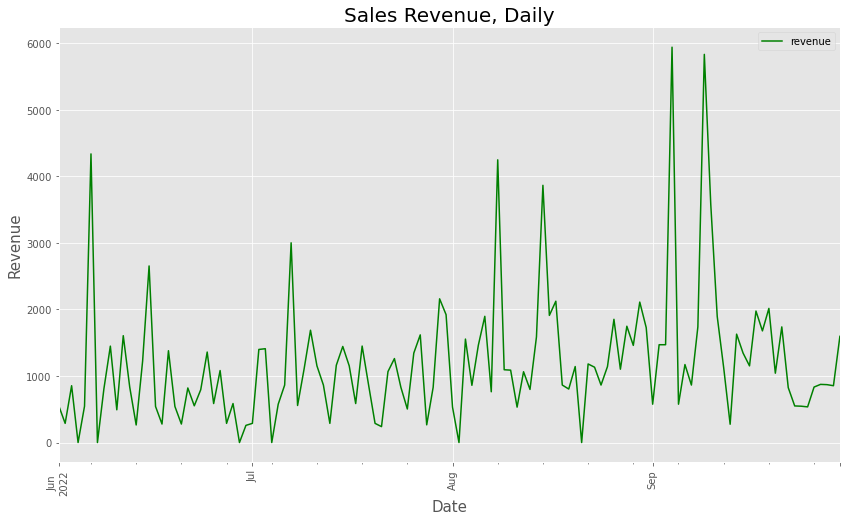

In [39]:
# Plot the daily sales over time
plt.figure(figsize=[14, 8]); # Set dimensions for figure
ds.plot(y='revenue', figsize = (14, 8), legend = True, color='g')

plt.title('Sales Revenue, Daily', size = 20)
plt.ylabel('Revenue', size = 15)
plt.xlabel('Date', size = 15)
plt.xticks(rotation=90)
plt.grid(True)

# Save plot to JPEG file
plt.savefig('11-daily-sales-revenue.jpg', dpi=300, bbox_inches='tight')

plt.show()

### Train Test Split

In [40]:
# Let's count the total days that we have in the dataset
len(ds)

122

In [41]:
# Now, let's split the data in 3 + 1 month
train = ds[:92]
test = ds[92:]

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2022-06-01 to 2022-08-31
Freq: D
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   revenue  92 non-null     int64
dtypes: int64(1)
memory usage: 1.4 KB


In [43]:
train.head()

,revenue
order_date,
2022-06-01,556
2022-06-02,288
2022-06-03,854
2022-06-04,0
2022-06-05,546


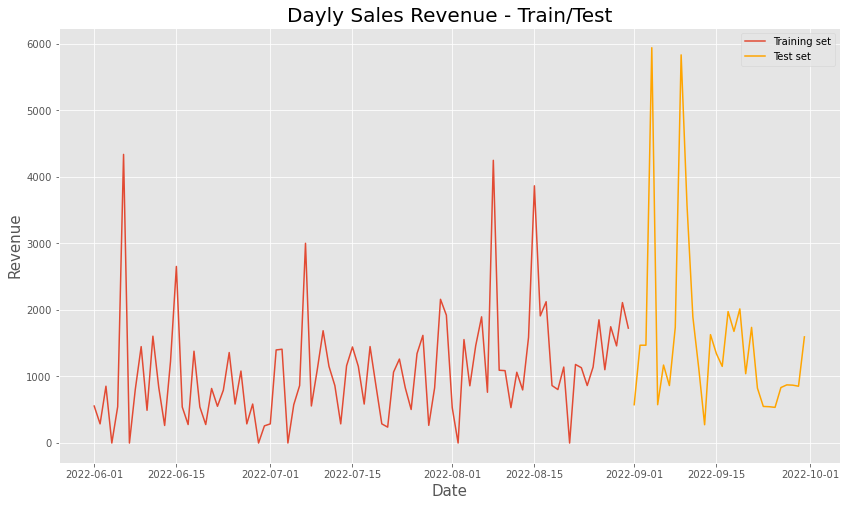

In [44]:
plt.figure(figsize=[14, 8]); # Set dimensions for figure
plt.title('Dayly Sales Revenue - Train/Test', size=20)
plt.plot(train['revenue'], label='Training set')
plt.plot(test, label='Test set', color='orange')
plt.legend();

plt.ylabel('Revenue', size = 15)
plt.xlabel('Date', size = 15)

# Save plot to JPEG file
plt.savefig('12-daily-sales-revenue-train-test.jpg', dpi=300, bbox_inches='tight')

plt.show()

### Check Seasonal Data

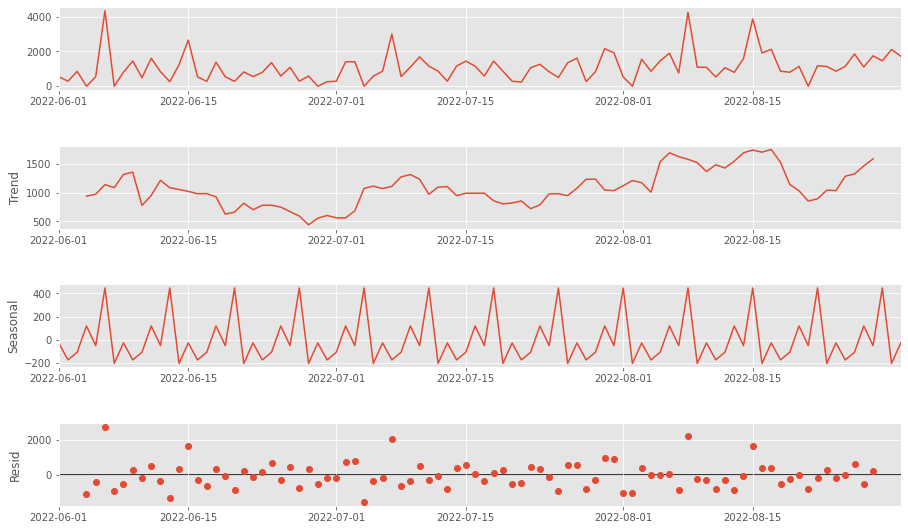

In [45]:
# Import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose data
decomp_results = seasonal_decompose(train, period = 7)
# Plot decomposed data
fig = decomp_results.plot()
fig.set_size_inches(14, 8)

# Save plot to JPEG file
plt.savefig('13-seasonal-decompose.jpg', dpi=300, bbox_inches='tight')

plt.show()

As we can see on charts our data set has a seasonal component and the residual component has some outliers

### ACF and PACF plots 

Use Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF) plots to estimate the SARIMA parameters (p, d, q) and (P, D, Q, s), where s is the seasonality period. Another option is to use grid search or stepwise algorithms to find the best parameters based on model selection criteria like the Akaike Information Criterion (AIC)

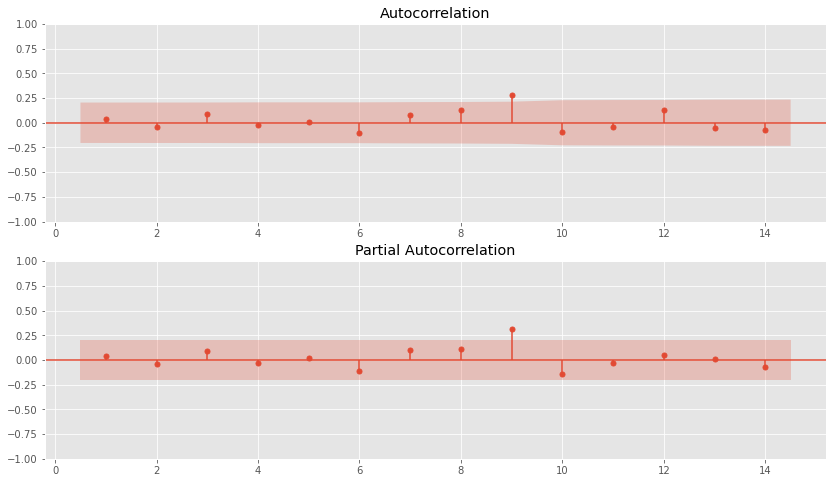

In [46]:
# NON SEASONAL ACF PACF -Let's check on this method the stationarity taking a look to Autocorrelation 
# Function and to the Partial Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig,(ax1, ax2) = plt.subplots(2,1, figsize=(14,8))
# Plot no seasonal ACF on ax1
plot_acf(train, ax=ax1, lags = 14, zero = False)
# Plot no seasonal PACF on ax1
plot_pacf(train, ax=ax2, lags = 14, zero = False, method = "ywm")

# Save plot to JPEG file
plt.savefig('14-acf-pacf-seasonal.jpg', dpi=300, bbox_inches='tight')

plt.show()

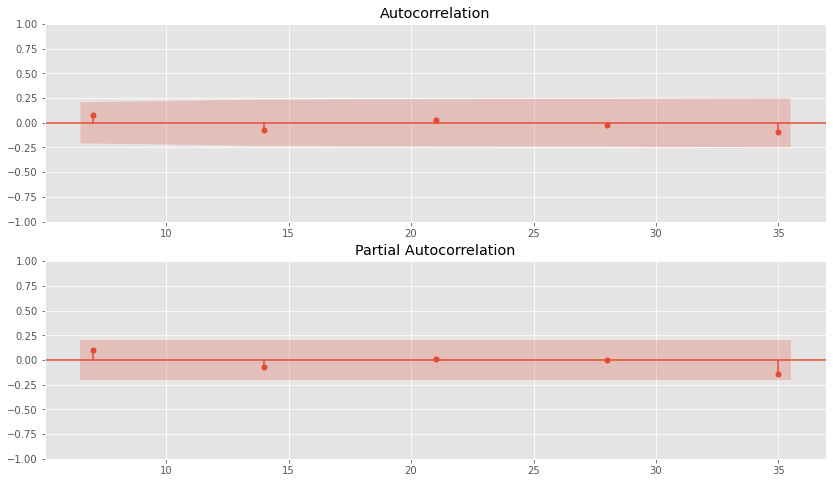

In [47]:
# SEASONAL ACF PACF - Let's check on this method the stationarity taking a look to Autocorrelation
# Function and to the Partial Autocorrelation Function
lags = [7,14,21,28,35]
# Create figure
fig,(ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(14, 8)
# Plot non seasonal ACF on ax1
plot_acf(train, ax=ax1, lags = lags, zero = False)
# Plot non seasonal PACF on ax1
plot_pacf(train, ax=ax2, lags = lags, zero = False, method = "ywm")

# Save plot to JPEG file
plt.savefig('15-acf-pacf-non-seasonal.jpg', dpi=300, bbox_inches='tight')

plt.show()

Both the ACF and PACF start with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

The difference between ACF(q value) and PACF is the inclusion or exclusion of indirect correlations in the calculation.

Additionally, you can see a darker area in the ACF and PACF plots. This dark area depicts the 95% confidence interval and is an indicator of the significance threshold. That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

To determine the order of the model, you check how many lollipops are above or below the confidence interval before the next lollipop enters the dark area

###  Augmented Dickey–Fuller Test (ADF)

If you are using a train-test split to build and evaluate a time series model, it is important to perform the ADF test on the train set only. This is because the test is used to determine whether the time series is stationary or not, and the model should be trained on stationary data to make accurate predictions.

Performing the ADF test on the entire dataframe, including the test set, can introduce data leakage and bias the results of the test. It is best to only use the train set for all preprocessing and modeling steps, including testing for stationarity.

Once the model is trained on the stationary train set, it can be used to make predictions on the test set. The ADF test should not be performed on the test set, as it would introduce the same data leakage issue. Instead, you can visually inspect the predicted values and compare them to the actual values to evaluate the model's performance on the test set.

In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
adftest = adfuller(train)

In [50]:
# Print the test statistics and p-values
print('ADF Statistic: %f' % adftest[0])
print('p-value: %f' % adftest[1])
print('Critical Values:')
for key, value in adftest[4].items():
    print('\t%s: %.3f' % (key, value))

# Check if the time series is stationary or not
if adftest[1] > 0.05:
    print("The time series is non-stationary")
else:
    print("The time series is stationary")
    
print('pvalue of adfuller test is: ', adftest[1])

ADF Statistic: -1.758863
p-value: 0.401068
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586
The time series is non-stationary
pvalue of adfuller test is:  0.4010678098916258


This result shows a large p-value, which means the test fails to reject the null hypothesis. So the ADF test also suggests that our time series is non-stationary.

The p-value is not enough to reject the null hypothesis at a 5% significance level.



With all the evidence above, let’s transform our time series to a stationary one.

### Transform to stationary: differencing

The choice of whether to difference the seasonal or non-seasonal data (or both) depends on the specific characteristics of the time series.

In general, if there is significant seasonality in the data, it is recommended to difference the seasonal component of the time series. This can be done using seasonal differencing. Seasonal differencing can help remove the effects of seasonality and make the time series stationary.

If there is no significant seasonality in the data, or if the seasonality is not well-defined, it may be more appropriate to perform non-seasonal differencing to remove trends or other non-seasonal patterns.

In some cases, both seasonal and non-seasonal differencing may be necessary to remove both trends and seasonality from the time series. However, it is important to be careful when differencing the data, as over-differencing can also introduce new problems such as excess noise and autocorrelation.

In [51]:
# Perform differencing on the training set (non sesonal)
train_diff = train.diff().dropna()

# Check for stationarity using the ADF test
adftest = adfuller(train_diff['revenue'])

print('ADF Statistic: %f' % adftest[0])
print('p-value: %f' % adftest[1])
print('Critical Values:')
for key, value in adftest[4].items():
    print('\t%s: %.3f' % (key, value))

# Check if the time series is stationary or not
if adftest[1] > 0.05:
    print("The time series is non-stationary")
else:
    print("The time series is stationary")

ADF Statistic: -7.893765
p-value: 0.000000
Critical Values:
	1%: -3.512
	5%: -2.897
	10%: -2.586
The time series is stationary


It is enough differencing the non seasonal data to make the data stationaty

### ACF plot and PACF plot with data stationary)

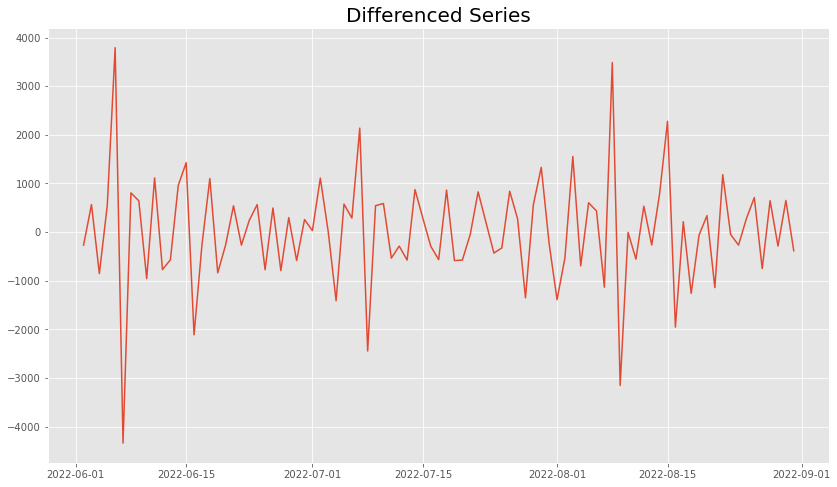

In [52]:
plt.figure(figsize=[14, 8]); # Set dimensions for figure
plt.title('Differenced Series', size=20)
plt.plot(train_diff)

# Save plot to JPEG file
plt.savefig('16-differenced Series.jpg', dpi=300, bbox_inches='tight')

plt.show()

As seen on graphic the Differenced Series is no stationary, but we can see a change of variance due to some high/low values

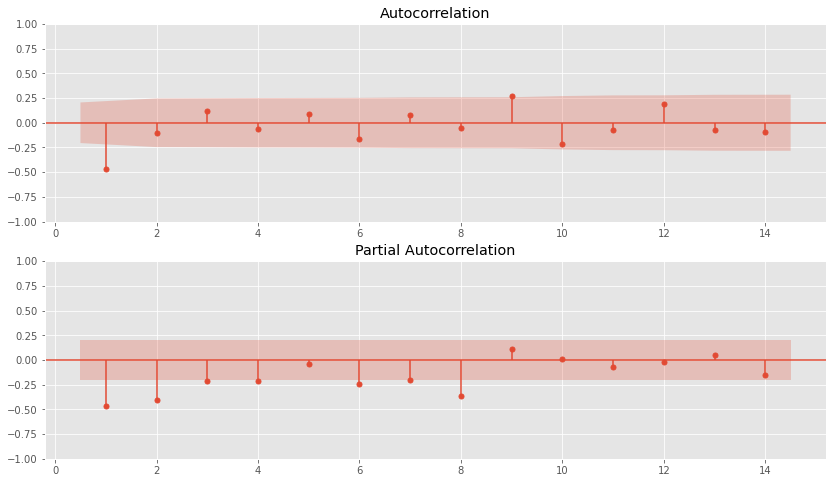

In [53]:
# NON SEASONAL ACF PACF -Let's check on this method the stationarity taking a look to Autocorrelation 
# Function and to the Partial Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig,(ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(14, 8)
# Plot no seasonal ACF on ax1
plot_acf(train_diff, ax=ax1, lags = 14, zero = False)
# Plot no seasonal PACF on ax1
plot_pacf(train_diff, ax=ax2, lags = 14, zero = False, method = "ywm")

# Save plot to JPEG file
plt.savefig('17-acf-pacf-seasonal-diff.jpg', dpi=300, bbox_inches='tight')

plt.show()

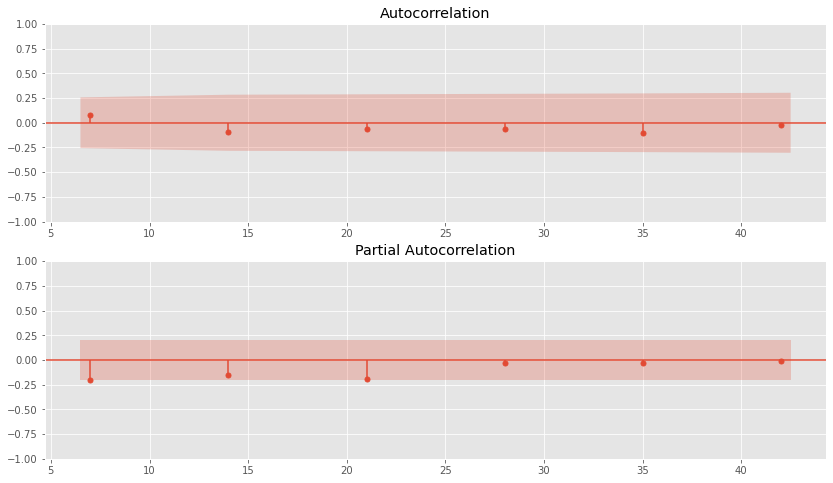

In [54]:
# SEASONAL ACF PACF - Let's check on this method the stationarity taking a look to Autocorrelation
# Function and to the Partial Autocorrelation Function
lags = [7,14,21,28,35,42]
# Create figure
fig,(ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(14, 8)
# Plot no seasonal ACF on ax1
plot_acf(train_diff, ax=ax1, lags = lags, zero = False)
# Plot no seasonal PACF on ax1
plot_pacf(train_diff, ax=ax2, lags = lags, zero = False, method = "ywm")

# Save plot to JPEG file
plt.savefig('18-acf-pacf-non-seasonal-diff.jpg', dpi=300, bbox_inches='tight')

plt.show()

###  Determine SARIMA models parameters

Yes, for the grid search, you should use the train_diff dataset since it is the stationary version of the training set that will be used to fit the ARIMA models.

Here's an example of how you can perform a grid search to find the optimal non-seasonal and seasonal order parameters for the ARIMA model based on the lowest AIC:

In [55]:
# Differencing parameters d = 1 ad D = 1, have been forced in order to obtain a better modeling fit
from pmdarima.arima import auto_arima

results = auto_arima(train,
            start_p = 0,
            start_q = 0,
            max_p = 5,
            d = 1,
            max_q = 5,
            seasonal=True,
            m=7,
            start_P = 0,
            D =1,
            start_Q = 0,
            max_P = 5,
            max_Q = 5,
            information_criterium = 'aic',
            trace=False,
            stepwise = True,
            error_action='ignore')

print("Best Model: ARIMA{}x{}7 - AIC:{}".format(results.order, results.seasonal_order, results.aic()))


Best Model: ARIMA(4, 1, 1)x(5, 1, 0, 7)7 - AIC:1401.9907868803602


In [56]:
p, d, q = results.order[0], results.order[1], results.order[2]
P, D, Q, S = results.seasonal_order[0],results.seasonal_order[1], results.seasonal_order[2],results.seasonal_order[3]

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit(maxiter=200)
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            revenue   No. Observations:                   92
Model:             SARIMAX(4, 1, 1)x(5, 1, [], 7)   Log Likelihood                -689.995
Date:                            Sun, 19 Mar 2023   AIC                           1401.991
Time:                                    23:49:45   BIC                           1428.730
Sample:                                06-01-2022   HQIC                          1412.740
                                     - 08-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0015      0.175      0.009      0.993      -0.342       0.345
ar.L2         -0.0891      0.136   

Prob(Q) (also known as the Ljung-Box Q statistic) is a measure of autocorrelation in the residuals of the model. A low Prob(Q) value (less than 0.05) suggests that there is significant autocorrelation remaining in the residuals and the model may not fit the data well.

Prob(JB) (also known as the Jarque-Bera statistic) is a measure of the normality of the residuals of the model. A low Prob(JB) value (less than 0.05) suggests that the residuals are not normally distributed and the model may not fit the data well.

In general, we want both Prob(Q) and Prob(JB) to have high values (close to 1.0) to indicate that the model fits the data well.

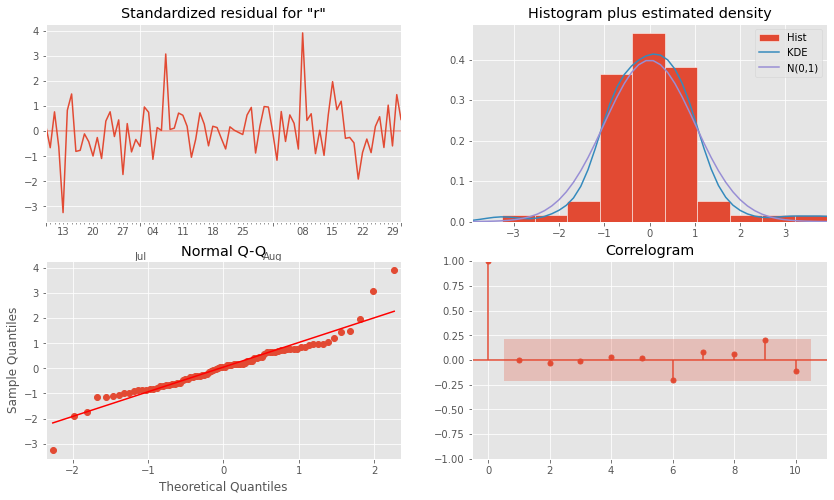

In [57]:
# Lets take a look to the Diagnostics Plot
model_fit.plot_diagnostics(figsize=(14,8))

# Save plot to JPEG file
plt.savefig('19-model-diagnostics.jpg', dpi=300, bbox_inches='tight')

plt.show()

###  Model Forecast

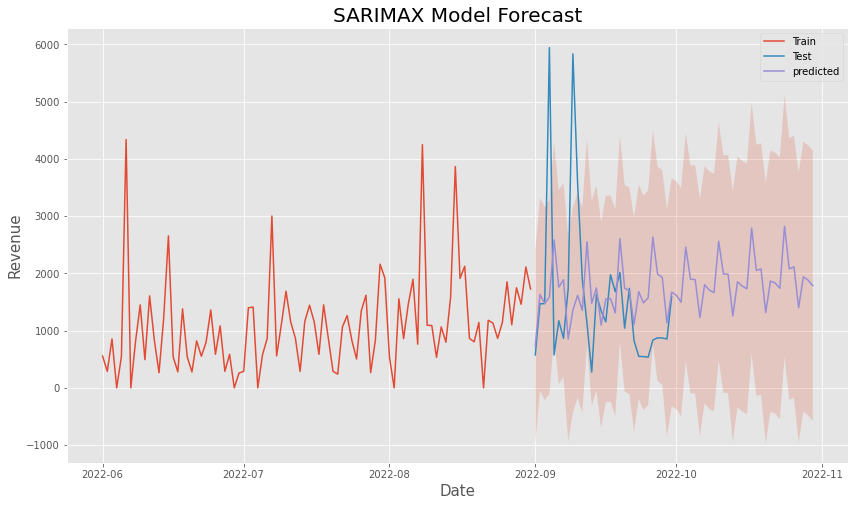

In [58]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=[14, 8]); # Set dimensions for figure
# make predictions on test set
forecast_object = model_fit.get_forecast(len(test)+30)

mean = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()
dates = mean.index

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')

plt.plot(dates, mean, label='predicted')
lower_limits = conf_int.iloc[:,0]
upper_limits = conf_int.iloc[:,1]
plt.fill_between(dates, lower_limits, upper_limits, alpha = 0.2)
plt.xlabel('Date', size = 15)
plt.ylabel('Revenue', size = 15)
plt.title('SARIMAX Model Forecast', size=20)
plt.legend()

# Save plot to JPEG file
plt.savefig('20-sarima-model-forecast', dpi=300, bbox_inches='tight')

plt.show()

### Evaluate model predictions


In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#divide into train and validation set to calculate R-squared score and mean absolute percentage error 
start=len(train)
end=len(train)+len(test)-1
predictions = model_fit.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['revenue'], predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['revenue'], predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test['revenue'], predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test['revenue'], predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test['revenue'])
                                                               /np.abs(test['revenue']))*100 
evaluation_results

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,-0.201871,979.031772,2.108351e+06,1452.016351,90.394591


Mean Absolute Error (MAE): MAE is the average of the absolute differences between the true values and the predicted values. A lower MAE indicates better performance of the model. It is easy to interpret, as it has the same unit as the target variable. To assess if the MAE is good or not, compare it to the scale of the target variable and the range of the data. A good MAE would be relatively small compared to the range of the target variable.

Mean Absolute Percentage Error (MAPE): MAPE is the average of the absolute percentage differences between the true values and the predicted values. It is a relative measure, expressed as a percentage, that is useful for comparing models across different scales. A lower MAPE indicates better performance. Generally, a MAPE value below 10% is considered good, but this can vary depending on the specific domain and problem.

Mean Squared Error (MSE): MSE is the average of the squared differences between the true values and the predicted values. It penalizes larger errors more than smaller errors due to the squaring. A lower MSE indicates better performance. To assess if the MSE is good or not, it can be helpful to take the square root of the MSE to get the root mean squared error (RMSE), which has the same unit as the target variable. Compare the RMSE to the scale and range of the target variable to determine if the value is good.

R-squared (R2) Score: R2 score is a relative measure that indicates the proportion of the variance in the target variable that is predictable from the input features. It ranges from 0 to 1, with higher values indicating better performance. An R2 score close to 1 means that the model explains a large portion of the variance in the target variable, while an R2 score close to 0 means that the model explains very little of the variance. To assess if the R2 score is good or not, consider the specific problem domain and the complexity of the model. In some cases, an R2 score above 0.7 may be considered good, while in other cases, an R2 score above 0.9 might be necessary for a model to be considered satisfactory.

As we ca see this model needs to be tunned better, we have to much error. ?So we have to analyze results

## Predicting sales using SARIMA model (v2)

### Resampling data


As we already saw before we have some outliers. There must be reason for that, but in this case we have no more information about this, and want to perform a better model prediction. So let´s reduce the effect of these otliers on the final result. 

In [60]:
ds2 = ds.copy()
# Identify the upper outliers using the IQR method
Q1 = ds2['revenue'].quantile(0.25)
Q3 = ds2['revenue'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.3 * IQR
upper_outliers = ds2['revenue'] > (Q3 + outlier_threshold)

# Create a DataFrame containing only the outlier rows
outlier_rows = ds2[upper_outliers]

print("List of upper outliers:")
print(outlier_rows)

# Modify upper outliers using an estimated proportion
estimated_proportion = 0.40 # Adjust this value as needed
ds2.loc[upper_outliers, 'revenue'] = ds2.loc[upper_outliers, 'revenue'] * estimated_proportion

List of upper outliers:
            revenue
order_date         
2022-06-06     4338
2022-06-15     2654
2022-07-07     3002
2022-08-08     4249
2022-08-15     3866
2022-09-04     5942
2022-09-09     5834
2022-09-10     3576


<Figure size 1008x576 with 0 Axes>

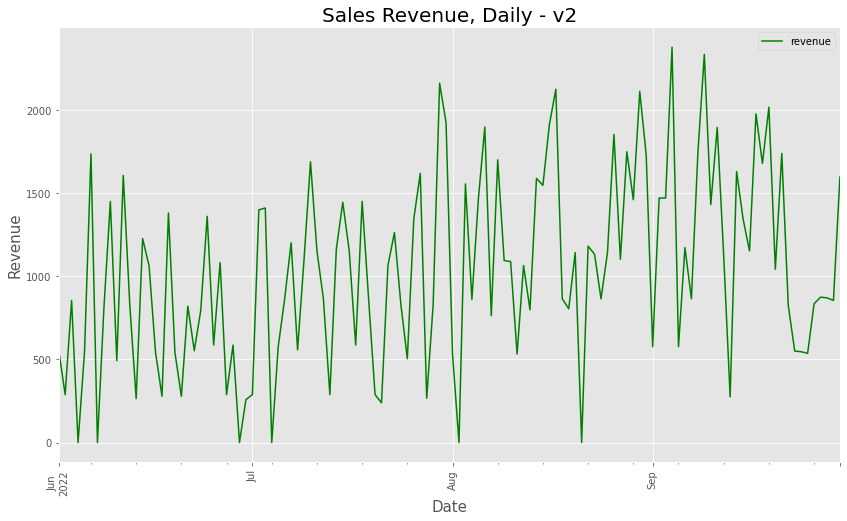

In [61]:
# Plot the daily sales over time
plt.figure(figsize=[14, 8]); # Set dimensions for figure
ds2.plot(y='revenue', figsize = (14, 8), legend = True, color='g')

plt.title('Sales Revenue, Daily - v2', size = 20)
plt.ylabel('Revenue', size = 15)
plt.xlabel('Date', size = 15)
plt.xticks(rotation=90)
plt.grid(True)

# Save plot to JPEG file
plt.savefig('21-daily-sales-revenue-v2.jpg', dpi=300, bbox_inches='tight')

plt.show()

In [62]:
ds2.head()

,revenue
order_date,
2022-06-01,556.0
2022-06-02,288.0
2022-06-03,854.0
2022-06-04,0.0
2022-06-05,546.0


### Train Test Split

In [63]:
# Now, let's split the data in 3 + 1 month
train2 = ds2[:92]
test2 = ds2[92:]

### Check Seasonal Data

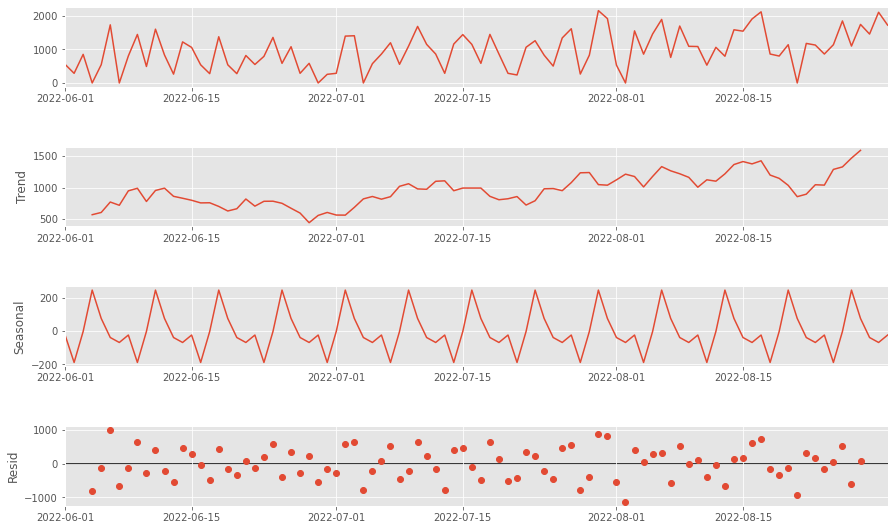

In [64]:
# Import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose data
decomp_results = seasonal_decompose(train2, period = 7)
# Plot decomposed data
fig = decomp_results.plot()
fig.set_size_inches(14, 8)

# Save plot to JPEG file
plt.savefig('22-seasonal-decompose-v2.jpg', dpi=300, bbox_inches='tight')

plt.show()

### ACF and PACF plots 

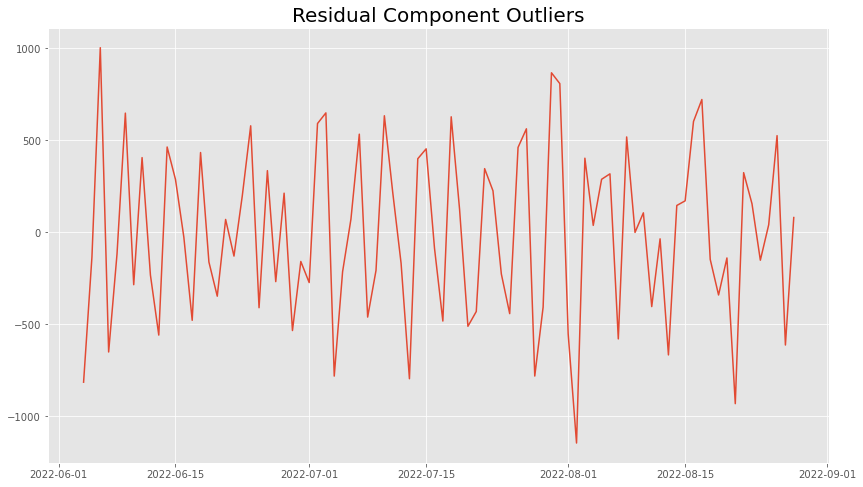

In [65]:
plt.figure(figsize=[14, 8]); # Set dimensions for figure
plt.title('Residual Component Outliers', size=20)

decomposition = seasonal_decompose(train2, period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.plot(residual)

# Save plot to JPEG file
plt.savefig('23-residual-component-v2.jpg', dpi=300, bbox_inches='tight')

plt.show()

As we can see the residual component has improved in the sense of removing outliers. For sure that this outliers must be due for some reasons, but as we have no more available data of this project we have remove them in order to achieve a better modeling for the time series data.

Use Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF) plots to estimate the SARIMA parameters (p, d, q) and (P, D, Q, s), where s is the seasonality period. Another option is to use grid search or stepwise algorithms to find the best parameters based on model selection criteria like the Akaike Information Criterion (AIC)

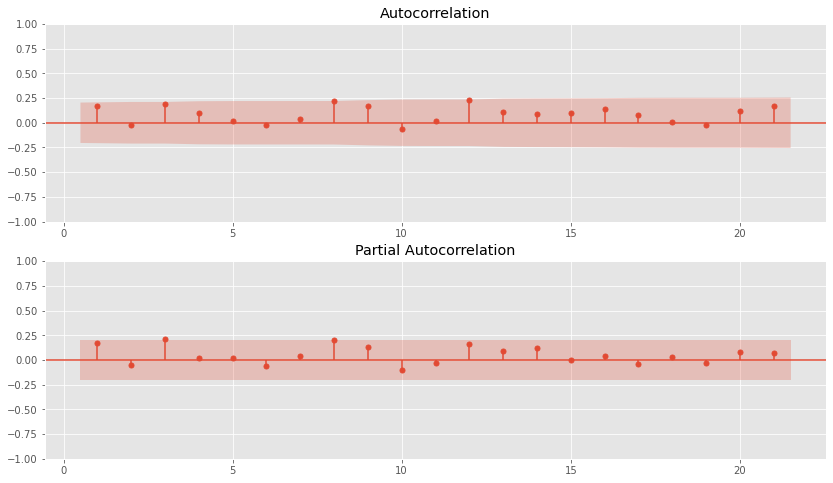

In [66]:
# NON SEASONAL ACF PACF -Let's check on this method the stationarity taking a look to Autocorrelation 
# Function and to the Partial Autocorrelation Function
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig,(ax1, ax2) = plt.subplots(2,1, figsize=(14,8))
# Plot no seasonal ACF on ax1
plot_acf(train2, ax=ax1, lags = 21, zero = False)
# Plot no seasonal PACF on ax1
plot_pacf(train2, ax=ax2, lags = 21, zero = False, method = "ywm")

# Save plot to JPEG file
plt.savefig('24-acf-pacf-non-seasonal-v2.jpg', dpi=300, bbox_inches='tight')

plt.show()

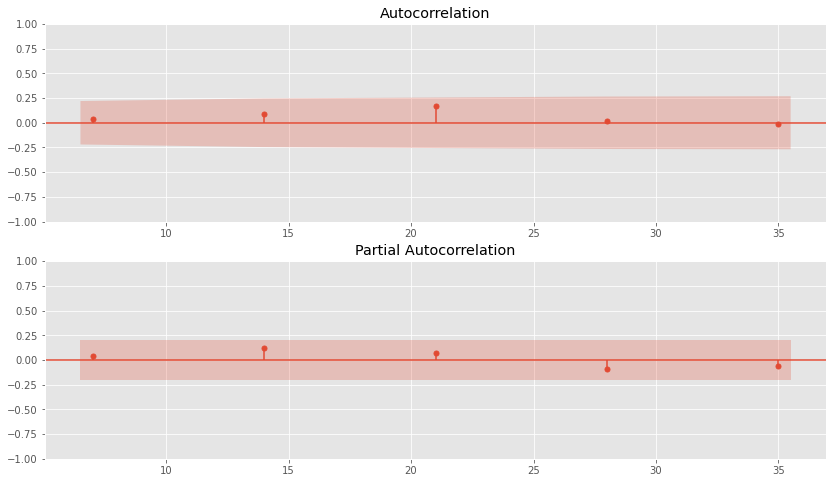

In [67]:
# SEASONAL ACF PACF - Let's check on this method the stationarity taking a look to Autocorrelation
# Function and to the Partial Autocorrelation Function
lags = [7,14,21,28,35]
# Create figure
fig,(ax1, ax2) = plt.subplots(2,1)
fig.set_size_inches(14, 8)
# Plot no seasonal ACF on ax1
plot_acf(train2, ax=ax1, lags = lags, zero = False)
# Plot no seasonal PACF on ax1
plot_pacf(train2, ax=ax2, lags = lags, zero = False, method = "ywm")

# Save plot to JPEG file
plt.savefig('25-acf-pacf-seasonal-v2.jpg', dpi=300, bbox_inches='tight')

plt.show()

Both the ACF and PACF start with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

The difference between ACF(q value) and PACF ( is the inclusion or exclusion of indirect correlations in the calculation.

Additionally, you can see a blue area in the ACF and PACF plots. This blue area depicts the 95% confidence interval and is an indicator of the significance threshold. That means, anything within the blue area is statistically close to zero and anything outside the blue area is statistically non-zero.

To determine the order of the model, you check:

“How [many] lollipops are above or below the confidence interval before the next lollipop enters the blue area?” — [2]



###  Augmented Dickey–Fuller Test (ADF)

If you are using a train-test split to build and evaluate a time series model, it is important to perform the ADF test on the train set only. This is because the test is used to determine whether the time series is stationary or not, and the model should be trained on stationary data to make accurate predictions.

Performing the ADF test on the entire dataframe, including the test set, can introduce data leakage and bias the results of the test. It is best to only use the train set for all preprocessing and modeling steps, including testing for stationarity.

Once the model is trained on the stationary train set, it can be used to make predictions on the test set. The ADF test should not be performed on the test set, as it would introduce the same data leakage issue. Instead, you can visually inspect the predicted values and compare them to the actual values to evaluate the model's performance on the test set.

In [68]:
from statsmodels.tsa.stattools import adfuller

In [69]:
adftest = adfuller(train2)

In [70]:
# Print the test statistics and p-values
print('ADF Statistic: %f' % adftest[0])
print('p-value: %f' % adftest[1])
print('Critical Values:')
for key, value in adftest[4].items():
    print('\t%s: %.3f' % (key, value))

# Check if the time series is stationary or not
if adftest[1] > 0.05:
    print("The time series is non-stationary")
else:
    print("The time series is stationary")
    
print('pvalue of adfuller test is: ', adftest[1])

ADF Statistic: -7.819374
p-value: 0.000000
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584
The time series is stationary
pvalue of adfuller test is:  6.734148470139639e-12


The p-value is enough to reject the null hypothesis at a 5% significance level, so we can consider that series is stationaty.

###  Determine SARIMA models parameters

In [71]:
# Differencing parameters d = 1 ad D = 1, have been forced in order to obtain a better modeling fit
from pmdarima.arima import auto_arima

results = auto_arima(train2,
            start_p = 0,
            start_q = 0,
            max_p = 10,
            d=1,
            max_q = 10,
            seasonal=True,
            m=7,
            start_P = 0,
            D=1,  
            start_Q = 0,
            max_P = 10,
            max_Q = 10,
            information_criterium = 'aic',
            trace=False,
            stepwise = True,
            error_action='ignore')

print("Best Model: ARIMA{}x{}7 - AIC:{}".format(results.order, results.seasonal_order, results.aic()))


Best Model: ARIMA(4, 1, 0)x(2, 1, 0, 7)7 - AIC:1335.392719579915


In [72]:
p, d, q = results.order[0], results.order[1], results.order[2]
P, D, Q, S = results.seasonal_order[0],results.seasonal_order[1], results.seasonal_order[2],results.seasonal_order[3]

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train2, order=(p, d, q), seasonal_order=(P, 1, Q, S))
model_fit = model.fit(maxiter=1000)
print(model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                           revenue   No. Observations:                   92
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 7)   Log Likelihood                -660.696
Date:                           Sun, 19 Mar 2023   AIC                           1335.393
Time:                                   23:50:10   BIC                           1352.408
Sample:                               06-01-2022   HQIC                          1342.233
                                    - 08-31-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7758      0.125     -6.209      0.000      -1.021      -0.531
ar.L2         -0.7369      0.142     -5.204

Prob(Q) (also known as the Ljung-Box Q statistic) is a measure of autocorrelation in the residuals of the model. A low Prob(Q) value (less than 0.05) suggests that there is significant autocorrelation remaining in the residuals and the model may not fit the data well.

Prob(JB) (also known as the Jarque-Bera statistic) is a measure of the normality of the residuals of the model. A low Prob(JB) value (less than 0.05) suggests that the residuals are not normally distributed and the model may not fit the data well.

In general, we want both Prob(Q) and Prob(JB) to have high values (close to 1.0) to indicate that the model fits the data well.

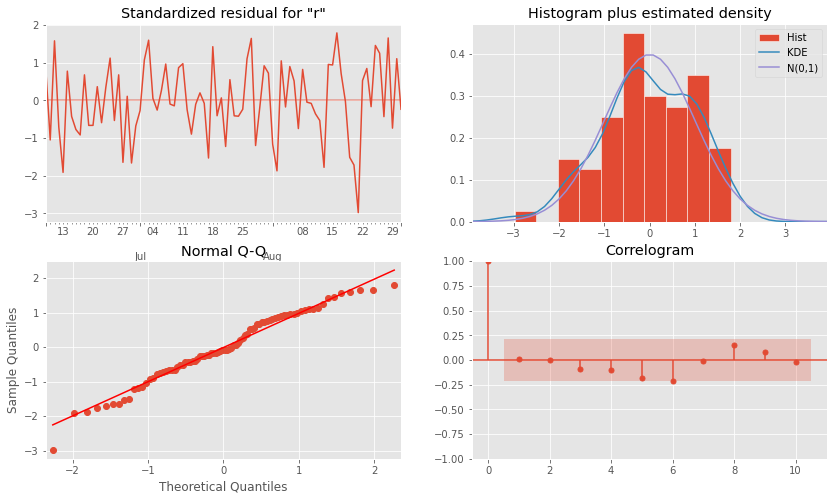

In [73]:
# Lets take a look to the Diagnostics Plot
model_fit.plot_diagnostics(figsize=(14,8))

# Save plot to JPEG file
plt.savefig('26-model-diagnostics-v2.jpg', dpi=300, bbox_inches='tight')

plt.show()

###  Model Forecast

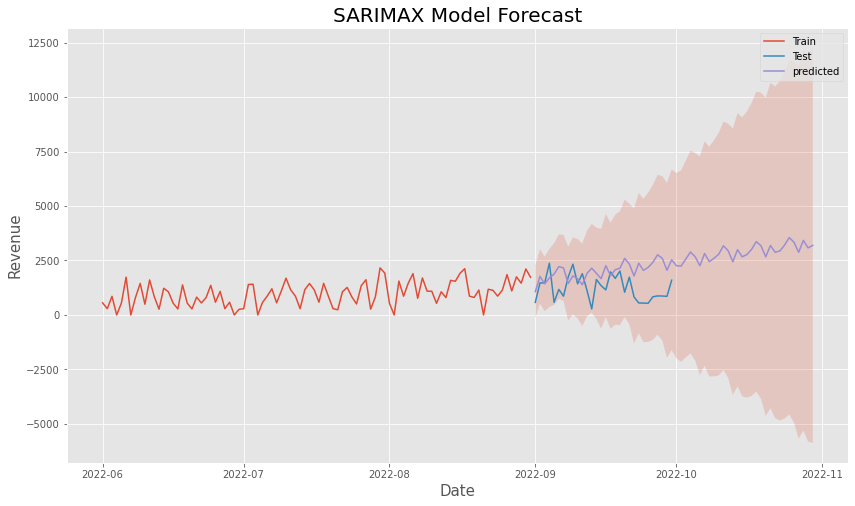

In [74]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=[14, 8]); # Set dimensions for figure
# make predictions on test set
forecast_object = model_fit.get_forecast(len(test2)+30)

mean = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()
dates = mean.index

plt.plot(train2.index, train2, label='Train')
plt.plot(test.index, test2, label='Test')

plt.plot(dates, mean, label='predicted')
lower_limits = conf_int.iloc[:,0]
upper_limits = conf_int.iloc[:,1]
plt.fill_between(dates, lower_limits, upper_limits, alpha = 0.2)
plt.xlabel('Date', size = 15)
plt.ylabel('Revenue', size = 15)
plt.title('SARIMAX Model Forecast', size=20)
plt.legend()

# Save plot to JPEG file
plt.savefig('27-sarima-model-forecast-v2', dpi=300, bbox_inches='tight')

plt.show()

### Evaluate model predictions


In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#divide into train and validation set to calculate R-squared score and mean absolute percentage error 
start=len(train2)
end=len(train2)+len(test2)-1
predictions = model_fit.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA Predictions')
evaluation_results = pd.DataFrame({'r2_score': r2_score(test2['revenue'], predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test2['revenue'], predictions)
evaluation_results['mean_squared_error'] = mean_squared_error(test2['revenue'], predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test2['revenue'], predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test2['revenue'])
                                                               /np.abs(test2['revenue']))*100 
evaluation_results

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error
0,-2.725036,907.522747,1.168131e+06,1080.800928,120.981847


Mean Absolute Error (MAE): MAE is the average of the absolute differences between the true values and the predicted values. A lower MAE indicates better performance of the model. It is easy to interpret, as it has the same unit as the target variable. To assess if the MAE is good or not, compare it to the scale of the target variable and the range of the data. A good MAE would be relatively small compared to the range of the target variable.

Mean Absolute Percentage Error (MAPE): MAPE is the average of the absolute percentage differences between the true values and the predicted values. It is a relative measure, expressed as a percentage, that is useful for comparing models across different scales. A lower MAPE indicates better performance. Generally, a MAPE value below 10% is considered good, but this can vary depending on the specific domain and problem.

Mean Squared Error (MSE): MSE is the average of the squared differences between the true values and the predicted values. It penalizes larger errors more than smaller errors due to the squaring. A lower MSE indicates better performance. To assess if the MSE is good or not, it can be helpful to take the square root of the MSE to get the root mean squared error (RMSE), which has the same unit as the target variable. Compare the RMSE to the scale and range of the target variable to determine if the value is good.

R-squared (R2) Score: R2 score is a relative measure that indicates the proportion of the variance in the target variable that is predictable from the input features. It ranges from 0 to 1, with higher values indicating better performance. An R2 score close to 1 means that the model explains a large portion of the variance in the target variable, while an R2 score close to 0 means that the model explains very little of the variance. To assess if the R2 score is good or not, consider the specific problem domain and the complexity of the model. In some cases, an R2 score above 0.7 may be considered good, while in other cases, an R2 score above 0.9 might be necessary for a model to be considered satisfactory.